### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Checking for null values

In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Dropping irrelevant values

In [5]:
df.drop('Car_Name',axis=1,inplace=True)

### Manual encoding

In [6]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

### One hot encoding

In [7]:
df=pd.get_dummies(df,columns=['Seller_Type','Transmission'])

In [8]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,0,1
1,2013,4.75,9.54,43000,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,0,1
3,2011,2.85,4.15,5200,0,0,1,0,0,1
4,2014,4.60,6.87,42450,1,0,1,0,0,1


### Plotting correlation heatmap

Text(0.5, 1.0, 'Corr')

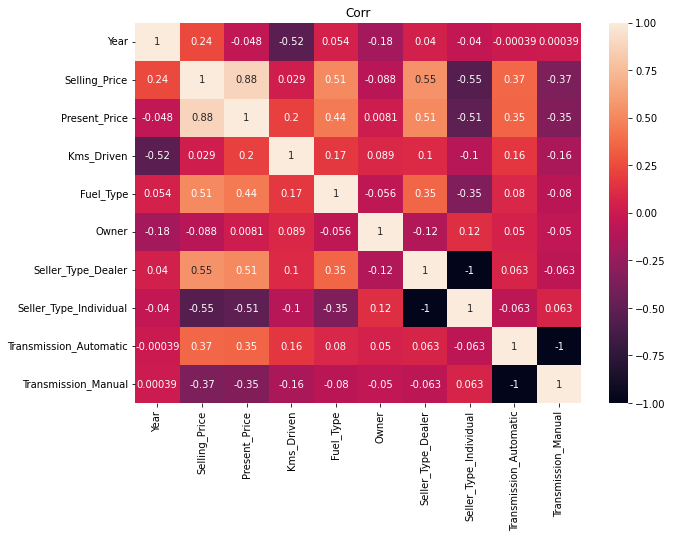

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Corr')

In [10]:
df.drop(['Owner'],axis=1,inplace=True)

### Separating dependant and independant variables

In [11]:
X=df.drop('Selling_Price',axis=1)
y=df.Selling_Price

### performing train-test-split

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Fitting linear regression

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_hat=lr.predict(X_test)

### Calculating accuracy

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mean_squared_error(y_hat,y_test)

3.2016294819318976